In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from pandas.api.types import CategoricalDtype
%matplotlib inline
from IPython.display import display
import seaborn as sns
plt.rc('font', family='Verdana')


train = pd.read_csv('train_data.csv')
train_df = pd.DataFrame(train)
test = pd.read_csv('test_data.csv')
test_df = pd.DataFrame(test)

X_train = train_df.iloc[:,0:145]
y_train = train_df.iloc[:,145]
X_test = test_df.iloc[:,0:145]
y_test = test_df.iloc[:,145]



In [41]:
y_train
#X_test.info(null_counts=True, verbose=True)

0       19.993461
1       19.904883
2       20.422236
3       19.872086
4       19.118784
5       20.317693
6       20.873962
7       21.958605
8       19.256145
9       17.804287
10      18.612138
11      18.376558
12      18.803732
13      18.203226
14      17.060746
15      17.897624
16      17.756137
17      16.124687
18      18.039740
19      17.805477
20      18.835822
21      18.169773
22      18.780293
23      18.065543
24      17.404215
25      18.891996
26      13.956817
27      15.245316
28      15.184674
29      16.354941
          ...    
3233   -14.730581
3234   -14.358879
3235    -5.271656
3236    -3.516992
3237    -4.141299
3238    -7.872886
3239   -10.460950
3240   -12.245768
3241   -15.046481
3242   -17.344295
3243   -16.839165
3244   -17.671923
3245   -16.727398
3246   -16.064932
3247   -18.063784
3248   -19.601836
3249   -19.948980
3250   -20.841723
3251   -17.632782
3252   -16.707672
3253   -17.949956
3254   -15.583049
3255   -13.100164
3256   -10.912945
3257   -11

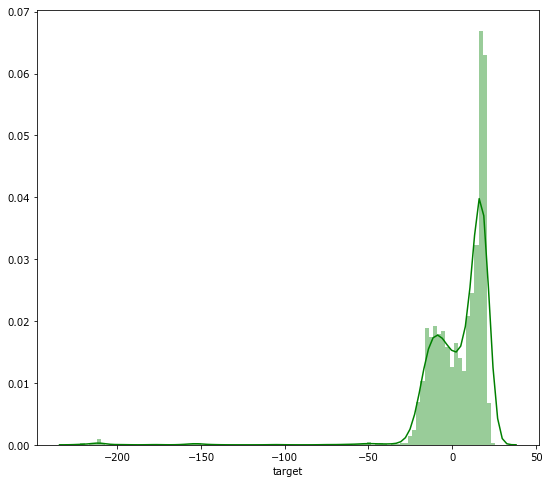

In [19]:
X_train["robot_engine_speed_13"].describe()
plt.figure(figsize=(9, 8))
#sns.distplot(X_train['robot_engine_temperature_11'], color='g', bins=100, hist_kws={'alpha': 0.4});
sns.distplot(y_train, color='g', bins=100, hist_kws={'alpha': 0.4});

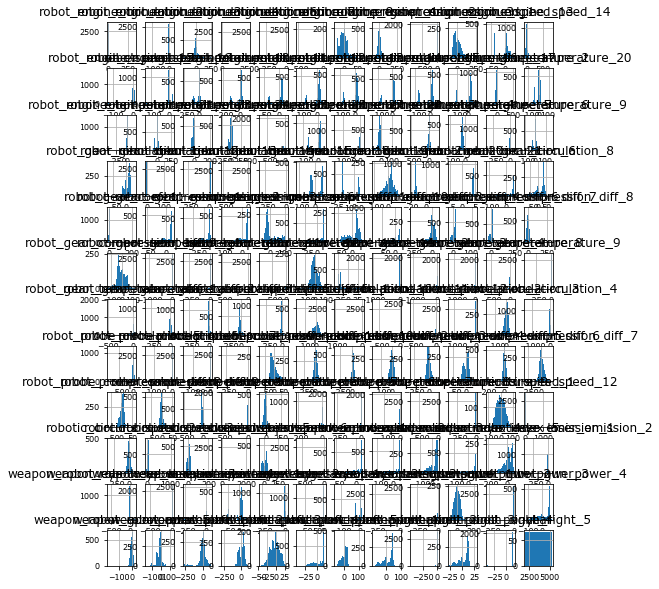

In [35]:
X_train.hist(figsize=(8, 10), bins=50, xlabelsize=8, ylabelsize=8);

In [32]:
df_corr = train_df.corr()['target'][:-1] # -1 because the latest row is target
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Target:\n{}".format(len(golden_features_list), golden_features_list))

There is 79 strongly correlated values with Target:
weapon_robot_gun_power_5             0.839867
weapon_robot_eye_laser_emission_4    0.833478
weapon_robot_gun_power_1             0.832985
robot_gear_temperature_4             0.826044
robot_gear_temperature_9             0.815952
robot_gear_temperature_8             0.815351
robot_gear_temperature_3             0.815219
robot_gear_temperature_11            0.786579
robot_gear_temperature_10            0.779332
weapon_robot_punch_right_3           0.776810
robot_gear_compression_diff_3        0.776604
robot_gear_temperature_12            0.769043
robot_gear_compression_3             0.749765
weapon_robot_armour_index_4          0.744522
robot_gear_circulation_13            0.741710
robot_gear_compression_2             0.741475
robot_gear_temperature_1             0.737836
weapon_robot_armour_index_2          0.736537
robot_gear_compression_1             0.734068
robot_probe_temperature_8            0.734038
robot_probe_temperature_9   

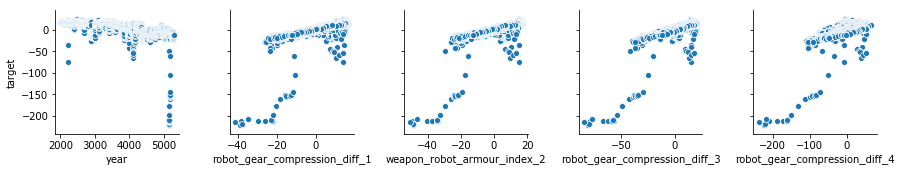

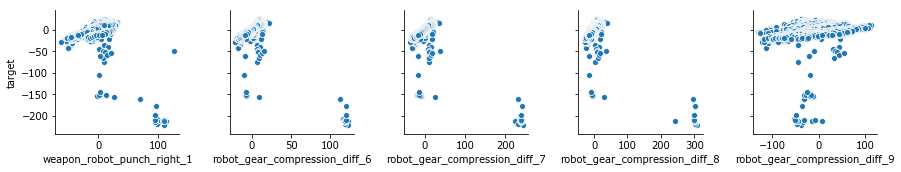

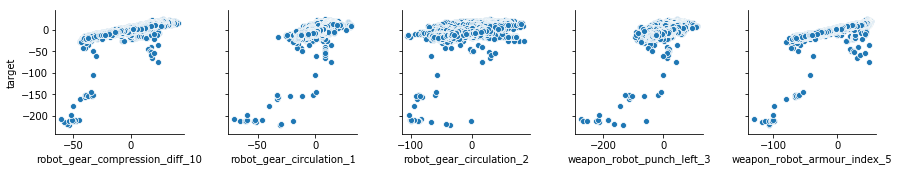

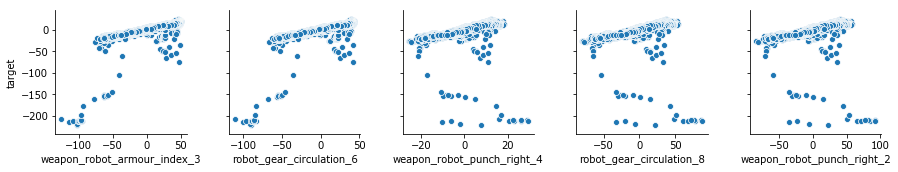

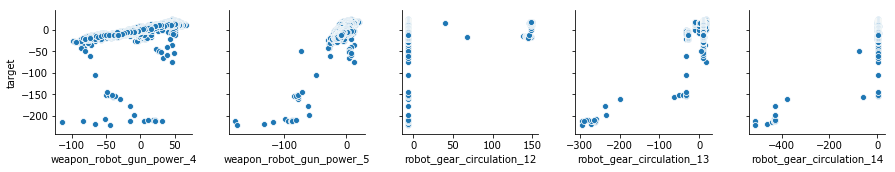

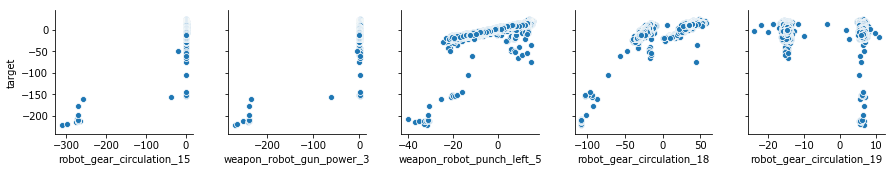

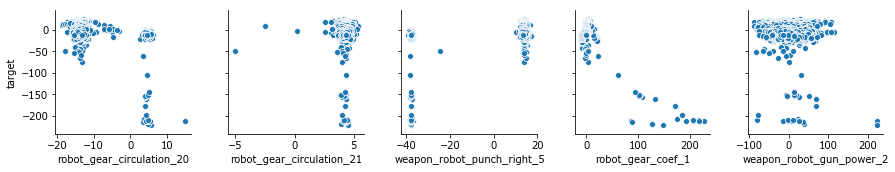

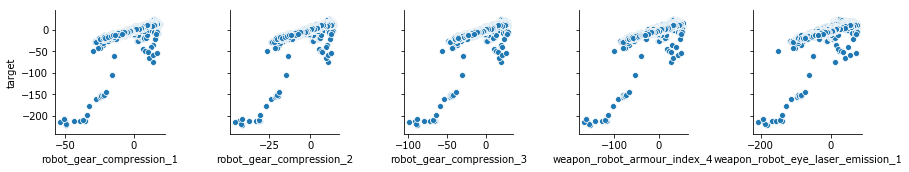

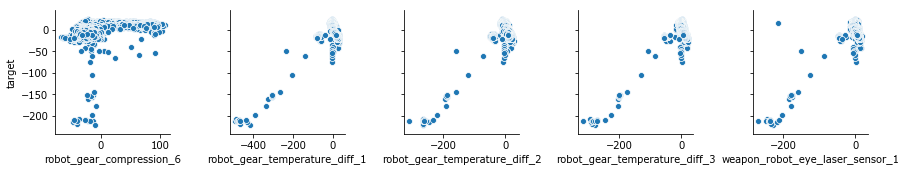

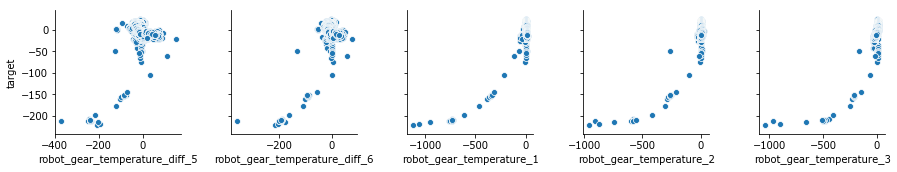

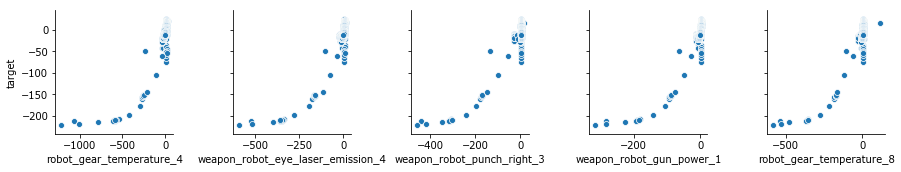

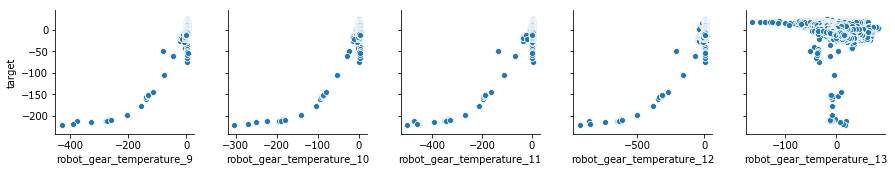

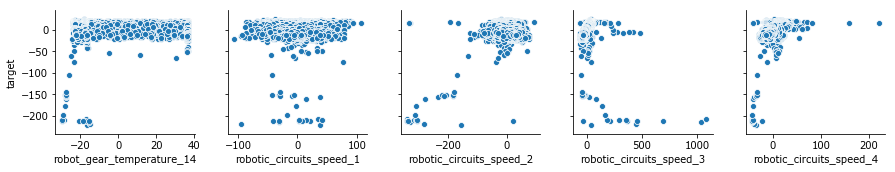

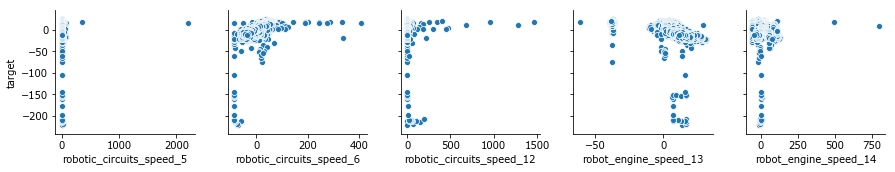

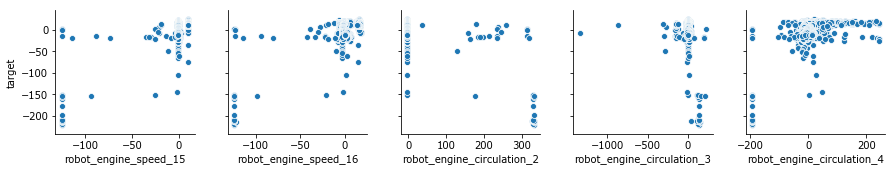

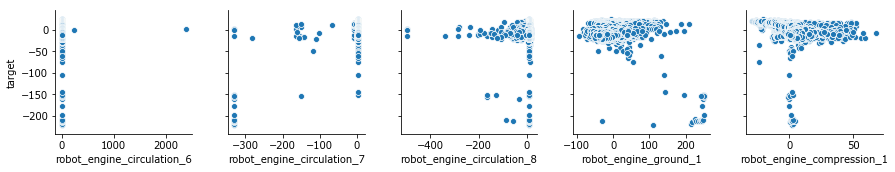

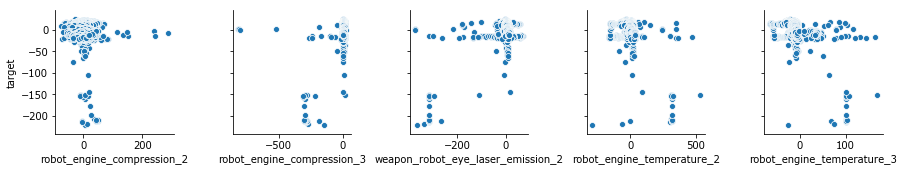

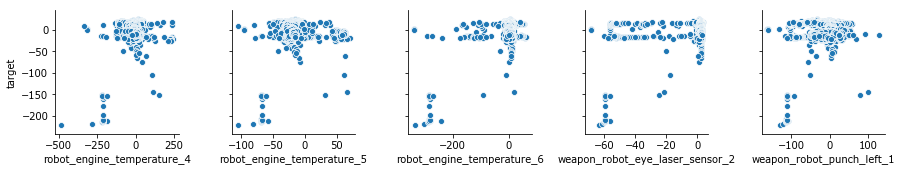

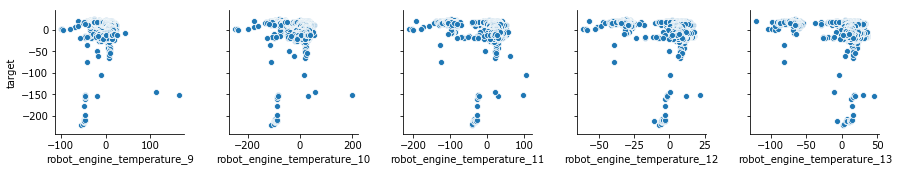

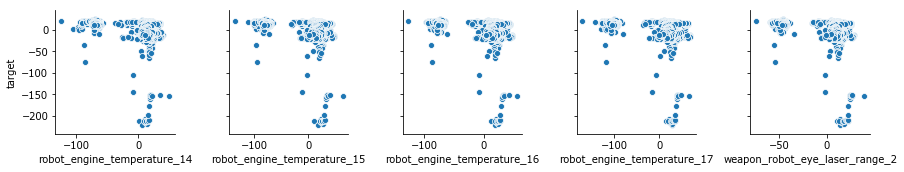

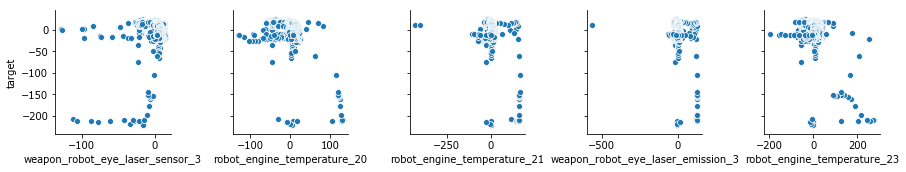

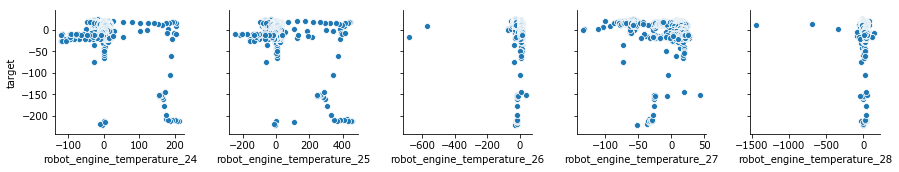

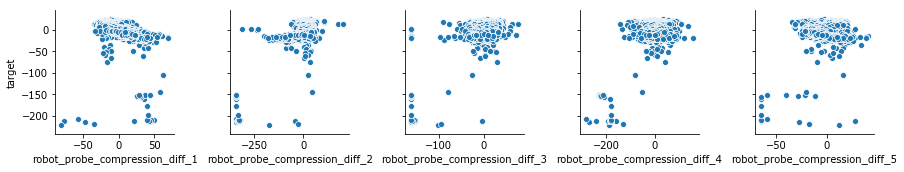

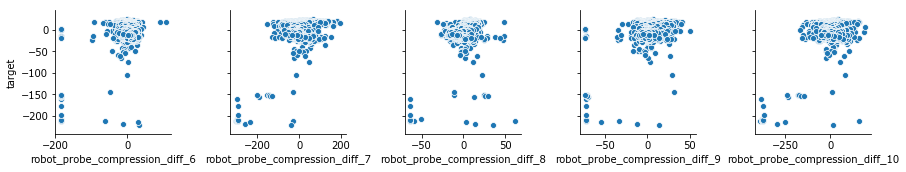

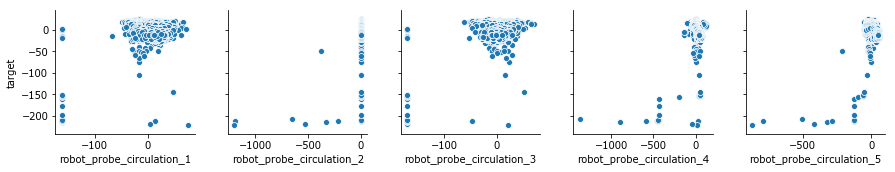

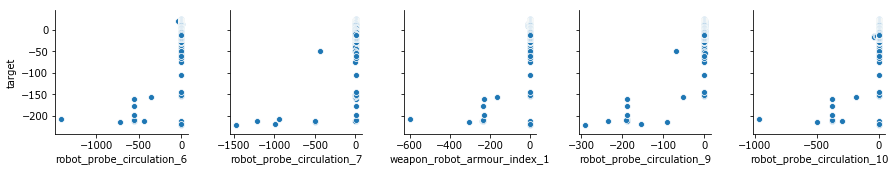

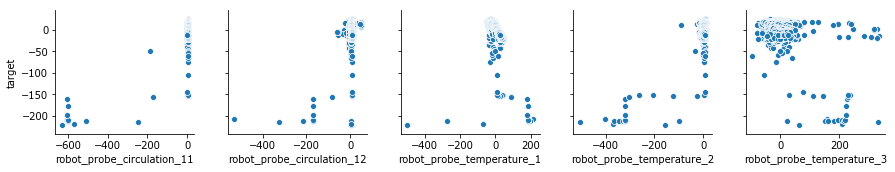

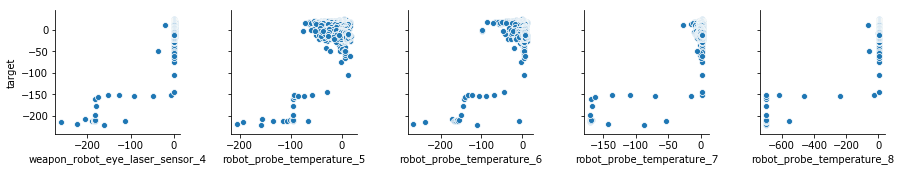

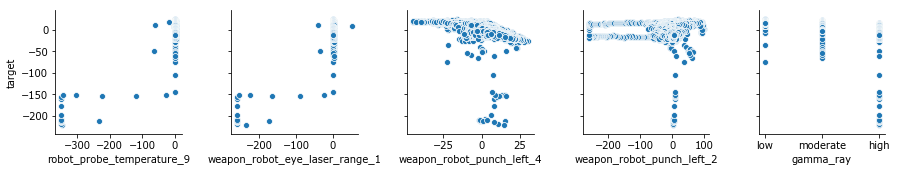

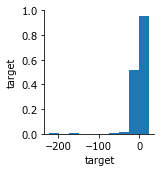

In [34]:
for i in range(0, len(train_df.columns), 5):
    sns.pairplot(data=train_df,
                x_vars=train_df.columns[i:i+5],
                y_vars=['target'])